In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('C://atp//atpplayers.json', lines=True)

In [3]:
#Seleciona dados do dataframe 
df.iloc[1]

_id                        {'$oid': '624ab34913b144c54b3c9abb'}
PlayerName                                       Novak Djokovic
Born                                           Belgrade, Serbia
Height                                                      188
Hand                          Right-Handed, Two-Handed Backhand
LinkPlayer    https://www.atptour.com/en/players/novak-djoko...
Tournament                                                Dubai
Location                                          Dubai, U.A.E.
Date                                    2022.02.21 - 2022.02.26
Ground                                                     Hard
Prize                                                $2,794,840
GameRound                                           Round of 16
GameRank                                                     26
Oponent                                         Karen Khachanov
WL                                                            W
Score                                   

In [4]:
#Remove colunas do dataframe
df.drop(columns=['_id'], inplace=True)
df.drop(columns=['LinkPlayer'], inplace=True)

In [5]:
#Confirma que todas as colunas do dataframe estao preenchidas
if df is not None:
    all_keys = df.columns
    print(all_keys)
else:
    print("DataFrame is empty or could not be read.")

#Procura todos os torneios que se realizam na India
if df is not None:
    india_locations = df[df['Location'].str.contains(r'\bIndia\b', case=False, regex=True)]
    print(india_locations)
else:
    print("DataFrame is empty or could not be read.")



df1= india_locations

india_locations.count() # Todos os campos estão preenchidos

distinct_tournaments = df['Tournament'].unique()

for tournament in distinct_tournaments:
    print(tournament)


#estuda os Tournament Scores
# assumindo que o df ]e o nosso DataFrame
max_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).max()
min_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).min()
print("Maximum number of sets played in any match:", max_number_of_sets_played)
print("Mainimun number of sets played in any match:", min_number_of_sets_played)


# Descobre o maximo e o minimo de sets jogados
max_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).max()
min_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).min()

# Encontra o indice do maximo e do minimo numero de sets jogados
max_sets_index = df1['Score'].apply(lambda x: len(x.split())).idxmax()
min_sets_index = df1['Score'].apply(lambda x: len(x.split())).idxmin()

print("Index of the row with maximum number of sets played:", max_sets_index)
print("Index of the row with minimum number of sets played:", min_sets_index)

# Seleciona a linha com o maximo e minimo numero de sets
max_sets_row = df1.loc[max_sets_index]
min_sets_row = df1.loc[min_sets_index]

print("Row with maximum number of sets played:")
print(max_sets_row)

print("\nRow with minimum number of sets played:")
print(min_sets_row)

Index(['PlayerName', 'Born', 'Height', 'Hand', 'Tournament', 'Location',
       'Date', 'Ground', 'Prize', 'GameRound', 'GameRank', 'Oponent', 'WL',
       'Score'],
      dtype='object')
              PlayerName              Born Height  \
1763     Daniil Medvedev    Moscow, Russia    198   
1764     Daniil Medvedev    Moscow, Russia    198   
1765     Daniil Medvedev    Moscow, Russia    198   
1766     Daniil Medvedev    Moscow, Russia    198   
1768     Daniil Medvedev    Moscow, Russia    198   
...                  ...               ...    ...   
1305046   Nicolas Kicker  Merlo, Argentina    178   
1305107   Nicolas Kicker  Merlo, Argentina    178   
1305108   Nicolas Kicker  Merlo, Argentina    178   
1306198    Preston Brown             Omaha    198   
1308152      Pedro Sousa  Lisbon, Portugal    180   

                                      Hand     Tournament          Location  \
1763     Right-Handed, Two-Handed Backhand        Chennai    Chennai, India   
1764     Right-Ha

In [6]:
print(df1.shape)
df1.isna().sum()

(17917, 14)


PlayerName    0
Born          0
Height        0
Hand          0
Tournament    0
Location      0
Date          0
Ground        0
Prize         0
GameRound     0
GameRank      0
Oponent       0
WL            0
Score         0
dtype: int64

In [7]:
# estudo do Score 
df1 = india_locations

# convertemos as colunas Score para string para estudar potenciais valores nulos
df1['Score'] = df1['Score'].astype(str)

# Get unique lengths of the "Score" column and sort them in ascending order
unique_lengths = sorted(df1['Score'].str.len().unique())

# Iterate over unique lengths and display scores for each length
for length in unique_lengths:
    scores_for_length = df1[df1['Score'].str.len() == length]['Score']
    print(f"Scores for length {length}:")
    print(scores_for_length)
    print()

df1.count()

#Elimina as linhas do score que forem nulas
#def is_numeric(s):
#    return all(char.isdigit() or char.isspace() for char in str(s))

df1 = df1[df1['Score'] != 'null']
# Limpa os valores null, NaN, ou espaços vazios da coluna "Score" 
df1.loc[:, 'Score'] = df1['Score'].dropna().apply(lambda x: x.strip())

#mudas as , para ''
df1['Score'] = df1['Score'].str.replace(',', '')

#muda as '  ' para ' '
df1['Score'] = df1['Score'].apply(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

# Filtra o DataFrame de modo a excluir linhas no "Score" que contém caracteres nao numéricos
#df2 = df1[df1['Score'].apply(lambda x: is_numeric(x))]



# Organiza de forma crescente os comprimentos da coluna "Score" 
unique_lengths = sorted(df1['Score'].str.len().unique())

# Itera sobre os comprimentos únicos das strings na coluna 'Score'
for length in unique_lengths:
    scores_for_length = df1[df1['Score'].str.len() == length]['Score']
    print(f"Scores for length {length}:")
    print(scores_for_length)
    print()

df1.count()


# Mostra o novo DataFrame
print(df1)


# Encontra o maximo e o minimo de numero de sets jogados
max_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).max()
min_number_of_sets_played = df1['Score'].apply(lambda x: len(x.split())).min()

# Dá-nos um indice das linhas com o maximo e o minimo de sts jogados
max_sets_index = df1['Score'].apply(lambda x: len(x.split())).idxmax()
min_sets_index = df1['Score'].apply(lambda x: len(x.split())).idxmin()

print("Index of the row with maximum number of sets played:", max_sets_index)
print("Index of the row with minimum number of sets played:", min_sets_index)


max_sets_row = df1.loc[max_sets_index]
min_sets_row = df1.loc[min_sets_index]

print("Row with maximum number of sets played:")
print(max_sets_row)

print("\nRow with minimum number of sets played:")
print(min_sets_row)

Scores for length 4:
9654       null
9734       null
9817       null
9900       null
14122      null
           ... 
1260252    null
1262846    null
1282070    null
1287837    null
1288893    null
Name: Score, Length: 183, dtype: object

Scores for length 5:
1763       36 46
1765       61 64
1766       64 63
1768       63 63
3043       06 16
           ...  
1300851    64 62
1302330    36 36
1305046    06 36
1305107    36 16
1306198    36 36
Name: Score, Length: 10843, dtype: object

Scores for length 6:
1142193    8-1006
1167747    10-860
Name: Score, dtype: object

Scores for length 7:
3364       67,  46
6023       67,  26
9898       76,  64
10026      76,  63
10027      76,  62
            ...   
1299545    76,  63
1299552    67,  36
1299554    67,  26
1299643    67,  57
1300001    67,  46
Name: Score, Length: 1209, dtype: object

Scores for length 8:
5557       63 36 63
9732       26 64 64
9814       63 46 67
9897       63 36 67
9971       46 63 36
             ...   
1299642    36

C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\377750936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Score'] = df1['Score'].astype(str)
C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\377750936.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Score'] = df1['Score'].str.replace(',', '')
C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\377750936.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

Scores for length 10:
95709      57 75 10-7
1132708    26 75 8-10
1295040    75 57 7-10
Name: Score, dtype: object

Scores for length 11:
22256      16 55 (RET)
26024      61 46 63 62
44351      64 30 (RET)
51768      76 32 (RET)
65280      64 64 36 61
              ...     
1262887    06 03 (RET)
1267957    76 20 (RET)
1272105    75 31 (RET)
1290955    63 20 (RET)
1296355    64 51 (RET)
Name: Score, Length: 389, dtype: object

Scores for length 14:
6315       67 61 32 (RET)
28537      61 46 64 36 26
32271      67 63 46 62 36
73130      67 60 10 (RET)
95505      75 46 14 (RET)
                ...      
1187235    64 46 64 16 36
1239863    64 67 04 (RET)
1244310    63 67 41 (RET)
1259981    76 06 01 (RET)
1290946    46 76 20 (RET)
Name: Score, Length: 184, dtype: object

Scores for length 15:
1167902    63 11-946 36 64
1181330    12-1415-1786 26
1189112    36 9-1164 63 46
Name: Score, dtype: object

Scores for length 16:
271430     67 76 75 46 10-8
768821     76 67 57 64 8-10
1181370   

In [8]:
df1.rename(columns={'Born': 'PlayerBorn'}, inplace=True)
df1.rename(columns={'Height': 'PlayerHeight'}, inplace=True)
df1.rename(columns={'Hand': 'PlayerHand'}, inplace=True)
df1.rename(columns={'GameRank': 'OpponentRank'}, inplace=True)
df1.rename(columns={'Oponent': 'OpponentName'}, inplace=True)

df1.iloc[1]

C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\1067406946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Born': 'PlayerBorn'}, inplace=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\1067406946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={'Height': 'PlayerHeight'}, inplace=True)
C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\1067406946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

PlayerName                        Daniil Medvedev
PlayerBorn                         Moscow, Russia
PlayerHeight                                  198
PlayerHand      Right-Handed, Two-Handed Backhand
Tournament                                Chennai
Location                           Chennai, India
Date                      2017.01.02 - 2017.01.08
Ground                                       Hard
Prize                                    $447,480
GameRound                             Semi-Finals
OpponentRank                                   96
OpponentName                            Dudi Sela
WL                                              W
Score                                    46 76 62
Name: 1764, dtype: object

In [9]:
import pandas as pd

# Supondo que você tenha um DataFrame chamado df1 com uma coluna chamada 'Date'
# e os valores estejam no formato de string
df1['Start_Date'] = pd.to_datetime(df1['Date'].str.split(' - ').str[0])
df1['End_Date'] = pd.to_datetime(df1['Date'].str.split(' - ').str[1])

C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\4162767572.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Start_Date'] = pd.to_datetime(df1['Date'].str.split(' - ').str[0])
C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\4162767572.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['End_Date'] = pd.to_datetime(df1['Date'].str.split(' - ').str[1])


In [10]:
df_india=df1.copy()
#  DataFrame com apenas uma linha para cada PlayerName
df_filtered = df1.drop_duplicates(subset='PlayerName')

# Criar coluna "BornOpponent" com base nos dados filtrados
df_india['OpponentBorn'] = df_india.apply(lambda x: df_filtered.loc[(df_filtered['PlayerName'] == x['OpponentName']),'PlayerBorn'].iloc[0] if any(df_filtered['PlayerName'] == x['OpponentName']) else None, axis=1)

# Criar coluna "HeightOpponent" com base nos dados filtrados
df_india['OpponentHeight'] = df_india.apply(lambda x: df_filtered.loc[(df_filtered['PlayerName'] == x['OpponentName']), 'PlayerHeight'].iloc[0] if any(df_filtered['PlayerName'] == x['OpponentName']) else None, axis=1)

# Criar coluna "HandOpponent" com base nos dados filtrados
df_india['OpponentHand'] = df_india.apply(lambda x: df_filtered.loc[(df_filtered['PlayerName'] == x['OpponentName']), 'PlayerHand'].iloc[0] if any(df_filtered['PlayerName'] == x['OpponentName']) else None, axis=1)


In [11]:
df_india.iloc[1]

PlayerName                          Daniil Medvedev
PlayerBorn                           Moscow, Russia
PlayerHeight                                    198
PlayerHand        Right-Handed, Two-Handed Backhand
Tournament                                  Chennai
Location                             Chennai, India
Date                        2017.01.02 - 2017.01.08
Ground                                         Hard
Prize                                      $447,480
GameRound                               Semi-Finals
OpponentRank                                     96
OpponentName                              Dudi Sela
WL                                                W
Score                                      46 76 62
Start_Date                      2017-01-02 00:00:00
End_Date                        2017-01-08 00:00:00
OpponentBorn                 Kiryat Shmonna, Israel
OpponentHeight                                  175
OpponentHand      Right-Handed, One-Handed Backhand
Name: 1764, 

In [12]:
# Criar uma nova coluna com o nome do jogador, oponente, torneio, data e game round, separados por vírgula, e organizados alfabeticamente
df_india['MirrorGames'] = df_india.apply(lambda x: ', '.join(sorted([x['PlayerName'], x['OpponentName']]) + [x['Tournament'], str(x['Date']), x['GameRound']]), axis=1)

In [13]:
import pandas as pd

# Substituir "-" por NaN na coluna 'GameRank'
df_india['OpponentRank'].replace("-", np.nan, inplace=True)

# Criar um dicionário para mapear 'MirrorGames' para 'GameRank'
player_rank_dict = dict(zip(df_india['MirrorGames'], df_india['OpponentRank']))

# Função para obter o PlayerRank usando o dicionário
def get_player_rank(row):
    # Verifica se o 'MirrorGames' está no dicionário
    if row['MirrorGames'] in player_rank_dict:
        # Retorna o 'GameRank' correspondente ao 'MirrorGames'
        return player_rank_dict[row['MirrorGames']]
    else:
        return None

# Adicionar a coluna 'PlayerRank' ao DataFrame
df_india['PlayerRank'] = df_india.apply(get_player_rank, axis=1)


In [14]:
# Mostrar o DataFrame atualizado
df_india.iloc[1]

PlayerName                                          Daniil Medvedev
PlayerBorn                                           Moscow, Russia
PlayerHeight                                                    198
PlayerHand                        Right-Handed, Two-Handed Backhand
Tournament                                                  Chennai
Location                                             Chennai, India
Date                                        2017.01.02 - 2017.01.08
Ground                                                         Hard
Prize                                                      $447,480
GameRound                                               Semi-Finals
OpponentRank                                                   96.0
OpponentName                                              Dudi Sela
WL                                                                W
Score                                                      46 76 62
Start_Date                                      

In [15]:
print(str(df_india['Start_Date'].min()) + " e " + str(df_india['End_Date'].max()))

1973-05-04 00:00:00 e 2022-03-27 00:00:00


In [16]:
from datetime import datetime

# Intervalo de anos desejado
ano_inicial = 1973
ano_final = 2022

# Dicionário de Estações na Índia
estacoes_india = {}

# Loop sobre os anos no intervalo
for ano in range(ano_inicial, ano_final + 1):
    estacoes_india[ano] = {
        'Vasanta (Primavera)': (datetime(year=ano, month=2, day=15), datetime(year=ano, month=4, day=15)),
        'Grishma (Verão)': (datetime(year=ano, month=4, day=15), datetime(year=ano, month=6, day=15)),
        'Varsha (Monções)': (datetime(year=ano, month=6, day=15), datetime(year=ano, month=8, day=15)),
        'Sharad (Outono)': (datetime(year=ano, month=8, day=15), datetime(year=ano, month=10, day=15)),
        'Hemanta (Pré-Inverno)': (datetime(year=ano, month=10, day=15), datetime(year=ano, month=12, day=15)),
        'Shishira (Inverno)': (datetime(year=ano, month=12, day=15), datetime(year=ano+1, month=2, day=15))}

# Função para obter a estação com base na data de início do jogo
def get_season(start_date):
    for year, seasons in estacoes_india.items():
        for season, (start, end) in seasons.items():
            if start_date >= start and start_date < end:
                return season
    return None

# Adicionar a coluna 'season' ao DataFrame
df_india['Season'] = df_india['Start_Date'].apply(get_season)

In [17]:
# Mostrar o DataFrame atualizado
df_india.iloc[1]

PlayerName                                          Daniil Medvedev
PlayerBorn                                           Moscow, Russia
PlayerHeight                                                    198
PlayerHand                        Right-Handed, Two-Handed Backhand
Tournament                                                  Chennai
Location                                             Chennai, India
Date                                        2017.01.02 - 2017.01.08
Ground                                                         Hard
Prize                                                      $447,480
GameRound                                               Semi-Finals
OpponentRank                                                   96.0
OpponentName                                              Dudi Sela
WL                                                                W
Score                                                      46 76 62
Start_Date                                      

In [18]:
#df_india['Withdrawal'] = df_india.loc[df_india['Score'].str.contains(r'\(W/O\)'), 'Score']
# Extrair informações e atribuir a uma nova coluna 'Withdrawal' apenas quando 'Score' contém '(RET)'
df_india.loc[df_india['Score'].str.contains(r'\(W/O\)'), 'Withdrawal'] = '(W/O)'
df_india.loc[df_india['Score'].str.contains(r'\(RET\)'), 'Withdrawal'] = '(RET)'


df_india['Sets'] = df_india['Score'].apply(lambda x:len(x.split()))

# Substituir os valores na coluna 'Sets' por NaN quando 'Withdrawal' não for NaN
df_india.loc[~df_india['Withdrawal'].isna(), 'Sets'] = np.nan

In [19]:
df_filtered = df_india[df_india['Sets'] == 1]

df_filtered[['Score', 'Sets','Withdrawal']]

,Score,Sets,Withdrawal
1142193,8-1006,1.0,NaN
1167747,10-860,1.0,NaN


In [20]:
df_india = df_india[df_india['Sets'] != 1]

In [21]:
df_filtered = df_india[df_india['Sets'] == 1]

df_filtered[['Score', 'Sets','Withdrawal']]

,Score,Sets,Withdrawal


In [22]:
df_india['Withdrawal'].unique()

array([nan, '(RET)', '(W/O)'], dtype=object)

In [23]:
# Inicializar um dicionário para armazenar os torneios únicos e o número máximo de sets
tournaments_sets = {}

# Iterar sobre o DataFrame
for tournament in df_india['Tournament'].unique():
    # Filtrar o DataFrame para o torneio atual
    tournament_data = df_india[df_india['Tournament'] == tournament]
    # Encontrar o número máximo de sets para o torneio atual
    max_sets = tournament_data['Sets'].max()
    # Adicionar o torneio e o número máximo de sets ao dicionário
    tournaments_sets[tournament] = max_sets

# Mostrar o dicionário resultante
print(tournaments_sets)

{'Chennai': 3.0, 'IND vs. ITA DC Qualifier 1st Round': 2.0, 'Pune': 3.0, 'Mumbai': 3.0, 'IND vs. SRB WG Play-Off': 5.0, 'Bengaluru': 3.0, 'Bangalore': 3.0, 'JPN v. IND AOG I 2nd Round': 5.0, 'Kolkata': 3.0, 'New Delhi': 5.0, 'IND vs. CZE WG Play-Off': 3.0, 'India F7': 3.0, 'India F6': 3.0, 'Indore': 3.0, 'IND vs. ESP WG Play-Off': 4.0, 'India F3': 3.0, 'India F1': 3.0, 'Belgaum': 3.0, 'Dharwad': 3.0, 'Tumkur': 3.0, 'Bengaluru 2': 3.0, 'India F10': 3.0, 'India F9': 3.0, 'India F8': 3.0, 'G1 IND vs DEN Round 1': 3.0, 'AOG1 IND vs. UZB': 4.0, 'AOG1 IND vs. NZL 1st Round': 3.0, 'IND vs. KOR AOG1 2nd RD': 5.0, 'India F19': 3.0, 'India F16': 3.0, 'India F2': 3.0, 'India F5': 3.0, 'India F4': 3.0, 'India F11': 3.0, 'India F17': 3.0, 'India F15': 3.0, 'India F14': 3.0, 'India F13': 3.0, 'India F12': 3.0, 'Chikmagalur': 3.0, 'India F18': 3.0, 'New Delhi 2': 3.0, 'IND vs. UZB AOGI 1st. RD': 5.0, 'IND vs. UZB AOGI 2nd RD': 3.0, 'Jaipur': 3.0, 'Lucknow 2': 3.0, 'New Delhi IV': 3.0, 'New Delhi III'

In [24]:
def determinar_bo3_bo5(row):
    torneio = row['Tournament']
    max_sets = tournaments_sets.get(torneio)
    if max_sets <=3:
        return 3
    else:
        return 5
    
df_india['Bo3_Bo5'] = df_india.apply(determinar_bo3_bo5, axis=1)

In [25]:
df_india.iloc[1]

PlayerName                                          Daniil Medvedev
PlayerBorn                                           Moscow, Russia
PlayerHeight                                                    198
PlayerHand                        Right-Handed, Two-Handed Backhand
Tournament                                                  Chennai
Location                                             Chennai, India
Date                                        2017.01.02 - 2017.01.08
Ground                                                         Hard
Prize                                                      $447,480
GameRound                                               Semi-Finals
OpponentRank                                                   96.0
OpponentName                                              Dudi Sela
WL                                                                W
Score                                                      46 76 62
Start_Date                                      

In [26]:
#Carregar um csv com informações dos jogadores ATP
df_players=pd.read_csv('C://atp//Player.csv')

df_india['Start_Date'] = pd.to_datetime(df_india['Start_Date'])
df_india['End_Date']  = pd.to_datetime(df_india['End_Date'] )

df_players['birthday'] = pd.to_datetime(df_players['birthday'])

df_players.iloc[1:5]

,player_id,name,hand,country,birthday
1,atp_100003,Frank Sedgman,R,AUS,1927-10-02
2,atp_100004,Giuseppe Merlo,R,ITA,1927-10-11
3,atp_100005,Richard Pancho Gonzales,R,USA,1928-05-09
4,atp_100006,Grant Golden,R,USA,1929-08-21


In [27]:
# Iterate over each row in df1
for index, row in df_india.iterrows():
    player_name = row['PlayerName']
    
    # Search for matching names in df_players
    matching_player = df_players[df_players['name'] == player_name]
    
    # Check if a matching player is found
    if not matching_player.empty:
        # Retrieve the corresponding birthday
        birthday = matching_player['birthday'].iloc[0]
        
        # Add the birthday to a new column in df1
        df_india.loc[index, 'PlayerBirth'] = birthday
    else:
        # If no matching player is found, mark it as NaN
        df_india.loc[index, 'PlayerBirth'] = float('NaN')
        
# Criar a coluna PlayerAge com a idade do jogador no inicio do torneio 
df_india['PlayerAge'] = (df_india['Start_Date'] - df_india['PlayerBirth']).dt.days // 365

In [28]:
df_india.iloc[1]

PlayerName                                          Daniil Medvedev
PlayerBorn                                           Moscow, Russia
PlayerHeight                                                    198
PlayerHand                        Right-Handed, Two-Handed Backhand
Tournament                                                  Chennai
Location                                             Chennai, India
Date                                        2017.01.02 - 2017.01.08
Ground                                                         Hard
Prize                                                      $447,480
GameRound                                               Semi-Finals
OpponentRank                                                   96.0
OpponentName                                              Dudi Sela
WL                                                                W
Score                                                      46 76 62
Start_Date                                      

In [29]:
# Importar a biblioteca pandas
import pandas as pd

# Supondo que você já tenha carregado seus dados em um DataFrame chamado df_india

# Função para calcular a data de nascimento do oponente
def calculate_opponent_birth(row):
    # Encontrar o jogo espelho com o mesmo 'MirrorGames' e 'PlayerName' diferente
    mirror_game = df_india[
        (df_india['MirrorGames'] == row['MirrorGames']) &
        (df_india['PlayerName'] != row['PlayerName'])
    ]
    # Verificar se encontrou algum jogo espelho
    if not mirror_game.empty:
        # Retornar a data de nascimento do oponente do primeiro jogo espelho encontrado
        return mirror_game['PlayerBirth'].iloc[0]
    else:
        return None

# Adicionar a coluna 'Opponent_Birth' ao DataFrame com a data de nascimento do oponente
df_india['OpponentBirth'] = df_india.apply(calculate_opponent_birth, axis=1)

# Criar a coluna OpponentAge com a idade do jogador no inicio do torneio 
df_india['OpponentAge'] = (df_india['Start_Date'] - df_india['OpponentBirth']).dt.days // 365

In [30]:
df_india.iloc[1]

PlayerName                                          Daniil Medvedev
PlayerBorn                                           Moscow, Russia
PlayerHeight                                                    198
PlayerHand                        Right-Handed, Two-Handed Backhand
Tournament                                                  Chennai
Location                                             Chennai, India
Date                                        2017.01.02 - 2017.01.08
Ground                                                         Hard
Prize                                                      $447,480
GameRound                                               Semi-Finals
OpponentRank                                                   96.0
OpponentName                                              Dudi Sela
WL                                                                W
Score                                                      46 76 62
Start_Date                                      

In [31]:
# Criar o DataFrame df_final com os valores únicos da coluna 'MirrorGames'
df = df_india.drop_duplicates(subset=['MirrorGames'])

# Resetar o índice
df.reset_index(drop=True, inplace=True)

#Numero de linhas 
print(df.shape)

(9233, 29)


In [32]:
df.drop(columns=['MirrorGames'], inplace=True)

C:\Users\diogo\AppData\Local\Temp\ipykernel_9572\1744139708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['MirrorGames'], inplace=True)


In [33]:
df.columns.tolist()

['PlayerName',
 'PlayerBorn',
 'PlayerHeight',
 'PlayerHand',
 'Tournament',
 'Location',
 'Date',
 'Ground',
 'Prize',
 'GameRound',
 'OpponentRank',
 'OpponentName',
 'WL',
 'Score',
 'Start_Date',
 'End_Date',
 'OpponentBorn',
 'OpponentHeight',
 'OpponentHand',
 'PlayerRank',
 'Season',
 'Withdrawal',
 'Sets',
 'Bo3_Bo5',
 'PlayerBirth',
 'PlayerAge',
 'OpponentBirth',
 'OpponentAge']

In [34]:
# Criar uma lista com a ordem das colunas, movendo 'PlayerRank' para a sexta posição
nova_ordem_colunas = ['PlayerName', 'PlayerBorn', 'PlayerHeight', 'PlayerHand', 'PlayerRank', 'PlayerBirth', 'PlayerAge',
 'Tournament', 'Bo3_Bo5', 'Location', 'Date', 'Start_Date', 'End_Date', 'Season', 'Ground', 'Prize', 'GameRound', 'WL',
 'Score', 'Withdrawal', 'Sets', 'OpponentName', 'OpponentBorn', 'OpponentHeight', 'OpponentHand', 'OpponentRank',
 'OpponentBirth', 'OpponentAge']

# Reorganizar as colunas do DataFrame com base na nova ordem
df = df[nova_ordem_colunas]
df.iloc[1]

PlayerName                          Daniil Medvedev
PlayerBorn                           Moscow, Russia
PlayerHeight                                    198
PlayerHand        Right-Handed, Two-Handed Backhand
PlayerRank                                     99.0
PlayerBirth                     1996-02-11 00:00:00
PlayerAge                                      20.0
Tournament                                  Chennai
Bo3_Bo5                                           3
Location                             Chennai, India
Date                        2017.01.02 - 2017.01.08
Start_Date                      2017-01-02 00:00:00
End_Date                        2017-01-08 00:00:00
Season                           Shishira (Inverno)
Ground                                         Hard
Prize                                      $447,480
GameRound                               Semi-Finals
WL                                                W
Score                                      46 76 62
Withdrawal  

In [35]:
print(df.shape)
df.isna().sum()

(9233, 28)


PlayerName           0
PlayerBorn           0
PlayerHeight         0
PlayerHand           0
PlayerRank         892
PlayerBirth       1311
PlayerAge         1311
Tournament           0
Bo3_Bo5              0
Location             0
Date                 0
Start_Date           0
End_Date            35
Season               0
Ground               0
Prize                0
GameRound            0
WL                   0
Score                0
Withdrawal        8835
Sets               398
OpponentName         0
OpponentBorn       721
OpponentHeight     721
OpponentHand       721
OpponentRank      1111
OpponentBirth     1851
OpponentAge       1851
dtype: int64

In [36]:
# Exportar o DataFrame df_final para um arquivo CSV
#df.to_csv('df_porLimpar_semDiffs.csv', index=False)

In [37]:
#Transformar todos os valores nulos em Na
import pandas as pd

# Supondo que você já tenha carregado o DataFrame df

# Lista das colunas que deseja verificar
columns_to_check = ["PlayerBorn", "PlayerHeight", "PlayerHand", "Prize", "OpponentBorn", "OpponentHeight", "OpponentHand"]

# Função para imprimir os valores únicos e suas contagens
def print_unique_values(df, columns):
    for column in columns:
        print(f"Valores únicos na coluna '{column}':")
        print(df[column].value_counts(dropna=False))
        print("\n")

print_unique_values(df, columns_to_check)

Valores únicos na coluna 'PlayerBorn':
PlayerBorn
                           2370
Chennai, India              809
New Delhi, India            368
Mumbai, India               246
Coimbatore, India           222
                           ... 
Mulhouse, France              1
Santo Domingo                 1
Decin, Czech Republic         1
Surabaya, Indonesia           1
Brighton, Great Britain       1
Name: count, Length: 608, dtype: int64


Valores únicos na coluna 'PlayerHeight':
PlayerHeight
NA     2382
188    1010
185     990
178     935
180     919
183     771
175     615
193     476
173     361
191     283
196      99
165      86
170      82
198      75
0        49
168      47
203      23
211      17
201      11
174       2
Name: count, dtype: int64


Valores únicos na coluna 'PlayerHand':
PlayerHand
Right-Handed, Two-Handed Backhand    4226
Right-Handed, Unknown Backhand       2074
null                                 1490
Right-Handed, One-Handed Backhand     698
Left-Handed, Two-

In [38]:
df['PlayerBorn'].replace("", np.nan, inplace=True)
df['PlayerHeight'].replace("NA", np.nan, inplace=True)
df['PlayerHand'].replace("null", np.nan, inplace=True)
df['Prize'].replace("", np.nan, inplace=True)
df['OpponentBorn'].replace(["", "None"], np.nan, inplace=True)
df['OpponentHeight'].replace(["NA", "None"], np.nan, inplace=True)
df['OpponentHand'].replace(["null", "None"], np.nan, inplace=True)

In [39]:
#df = pd.read_csv('C:\\Users\\diogo\\Documents\\2Ano\\ProjetoAplicadoCD\\df_porLimpar_semDiffs.csv')

In [40]:
print(df.shape)
# Passamos todos os valores do data frame para boleanos para encontrar valores ausentes
df.isna().sum()     

(9233, 28)


PlayerName           0
PlayerBorn        2370
PlayerHeight      2382
PlayerHand        1490
PlayerRank         892
PlayerBirth       1311
PlayerAge         1311
Tournament           0
Bo3_Bo5              0
Location             0
Date                 0
Start_Date           0
End_Date            35
Season               0
Ground               0
Prize              181
GameRound            0
WL                   0
Score                0
Withdrawal        8835
Sets               398
OpponentName         0
OpponentBorn      4248
OpponentHeight    4228
OpponentHand      2874
OpponentRank      1111
OpponentBirth     1851
OpponentAge       1851
dtype: int64

In [41]:
print(df['PlayerHand'].unique())
print(len(df['PlayerHand'].unique()))

print(df['OpponentHand'].unique())
print(len(df['OpponentHand'].unique()))

['Right-Handed, Two-Handed Backhand' 'Left-Handed, Two-Handed Backhand'
 'Right-Handed, One-Handed Backhand' 'Left-Handed, One-Handed Backhand'
 'Right-Handed, Unknown Backhand' 'Left-Handed, Unknown Backhand' nan
 'Ambidextrous, Two-Handed Backhand']
8
['Right-Handed, Two-Handed Backhand' 'Right-Handed, One-Handed Backhand'
 'Left-Handed, Two-Handed Backhand' 'Right-Handed, Unknown Backhand' None
 'Left-Handed, Unknown Backhand' 'Left-Handed, One-Handed Backhand' nan
 'Ambidextrous, Two-Handed Backhand']
9


In [42]:
print(df['GameRound'].unique())

['Finals' 'Semi-Finals' 'Quarter-Finals' 'Round of 16' 'Round of 32'
 'Round Robin' '2nd Round Qualifying' '1st Round Qualifying'
 '3rd Round Qualifying' 'Round of 64']


In [43]:
# Dividimos os valores da coluna 'PlayerHand' em duas partes e atribuimo-las a duas novas colunas
df[['PlayerMainHand', 'PlayerBackHand']] = df['PlayerHand'].str.split(',', expand=True)

# Removemos os espaços em branco ao redor das novas colunas
df['PlayerMainHand'] = df['PlayerMainHand'].str.strip()
df['PlayerBackHand'] = df['PlayerBackHand'].str.strip()

# Inserimos as colunas nas posições desejadas
df.insert(7, 'PlayerMainHand', df.pop('PlayerMainHand'))
df.insert(8, 'PlayerBackHand', df.pop('PlayerBackHand'))

# Dividimos os valores da coluna 'OpponentHand' em duas partes e atribuimos-las a duas novas colunas
df[['OpponentMainHand', 'OpponentBackHand']] = df['OpponentHand'].str.split(',', expand=True)

# Removemos os espaços em branco ao redor das novas colunas
df['OpponentMainHand'] = df['OpponentMainHand'].str.strip()
df['OpponentBackHand'] = df['OpponentBackHand'].str.strip()

In [44]:
df.iloc[1]

PlayerName                            Daniil Medvedev
PlayerBorn                             Moscow, Russia
PlayerHeight                                    198.0
PlayerHand          Right-Handed, Two-Handed Backhand
PlayerRank                                       99.0
PlayerBirth                       1996-02-11 00:00:00
PlayerAge                                        20.0
PlayerMainHand                           Right-Handed
PlayerBackHand                    Two-Handed Backhand
Tournament                                    Chennai
Bo3_Bo5                                             3
Location                               Chennai, India
Date                          2017.01.02 - 2017.01.08
Start_Date                        2017-01-02 00:00:00
End_Date                          2017-01-08 00:00:00
Season                             Shishira (Inverno)
Ground                                           Hard
Prize                                        $447,480
GameRound                   

### Redução de valores nulos

In [45]:
print(df.shape)
df.isna().sum()     

(9233, 32)


PlayerName             0
PlayerBorn          2370
PlayerHeight        2382
PlayerHand          1490
PlayerRank           892
PlayerBirth         1311
PlayerAge           1311
PlayerMainHand      1490
PlayerBackHand      1490
Tournament             0
Bo3_Bo5                0
Location               0
Date                   0
Start_Date             0
End_Date              35
Season                 0
Ground                 0
Prize                181
GameRound              0
WL                     0
Score                  0
Withdrawal          8835
Sets                 398
OpponentName           0
OpponentBorn        4248
OpponentHeight      4228
OpponentHand        2874
OpponentRank        1111
OpponentBirth       1851
OpponentAge         1851
OpponentMainHand    2874
OpponentBackHand    2874
dtype: int64

In [46]:
print("Valores nulos em PlayerRank:", df['PlayerRank'].isna().sum())
print("Valores nulos em OpponentRank:", 
df['OpponentRank'].isna().sum())

Valores nulos em PlayerRank: 892
Valores nulos em OpponentRank: 1111


In [47]:
#Para resolver o numero de nulos nas variaveis Rank
# Criar um dicionário para armazenar os valores não nulos de PlayerRank e OpponentRank
ranking_dict = {}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Se PlayerRank for nulo e o nome do jogador estiver no dicionário, substituir PlayerRank
    if pd.isnull(row['PlayerRank']) and row['PlayerName'] in ranking_dict:
        df.at[index, 'PlayerRank'] = ranking_dict[row['PlayerName']]
    
    # Se OpponentRank for nulo e o nome do oponente estiver no dicionário, substituir OpponentRank
    if pd.isnull(row['OpponentRank']) and row['OpponentName'] in ranking_dict:
        df.at[index, 'OpponentRank'] = ranking_dict[row['OpponentName']]
    
    # Atualizar o dicionário com os valores não nulos de PlayerRank
    if not pd.isnull(row['PlayerRank']):
        ranking_dict[row['PlayerName']] = row['PlayerRank']
    
    # Atualizar o dicionário com os valores não nulos de OpponentRank
    if not pd.isnull(row['OpponentRank']):
        ranking_dict[row['OpponentName']] = row['OpponentRank']
        
print("Valores nulos em PlayerRank:", df['PlayerRank'].isna().sum())
print("Valores nulos em OpponentRank:", 
df['OpponentRank'].isna().sum())
        
#Preencher os valores que continuam nulos por 3000 
df['PlayerRank'].fillna(3000, inplace=True)
df['OpponentRank'].fillna(3000, inplace=True)

Valores nulos em PlayerRank: 84
Valores nulos em OpponentRank: 635


In [48]:
print("Valores nulos em PlayerRank:", df['PlayerRank'].isna().sum())
print("Valores nulos em OpponentRank:", 
df['OpponentRank'].isna().sum())

Valores nulos em PlayerRank: 0
Valores nulos em OpponentRank: 0


In [49]:
#
#Esta seguinte parte nao faz nada, eu corri todos estes codigos na esperanca de ficar com menos nulos mas nao ganhei nada com isto
#Está outros comentarios como este quando o codigo voltar a fazer alguma coisa
#
print("Valores nulos em PlayerHand:", df['PlayerMainHand'].isna().sum())
print("Valores nulos em OpponentMainHand:", 
df['OpponentMainHand'].isna().sum())
print("Valores nulos em PlayerBackHand:", df['PlayerBackHand'].isna().sum())
print("Valores nulos em OpponentBackHand:", 
df['OpponentBackHand'].isna().sum())

Valores nulos em PlayerHand: 1490
Valores nulos em OpponentMainHand: 2874
Valores nulos em PlayerBackHand: 1490
Valores nulos em OpponentBackHand: 2874


In [50]:
#Usar o df_players para reduzir o numero de valores nulos nas variaveis "hand"
df_players.iloc[1:5]
valoreshand = df_players['hand'].unique()
print(valoreshand)

['R' 'L' 'U' nan 'A']


In [51]:
print(df['PlayerMainHand'].unique())

['Right-Handed' 'Left-Handed' nan 'Ambidextrous']


In [52]:
# Criar um mapeamento para substituir os valores
mapeamento_substituicao = {
    'R': 'Right-Handed',
    'L': 'Left-Handed',
    'U': np.nan,
    'A': 'Ambidextrous'
}

# Substituir valores nulos em 'PlayerMainHand' pelos valores correspondentes em df_players, aplicando o mapeamento
df['PlayerMainHand'].fillna(df['PlayerMainHand'].map(mapeamento_substituicao), inplace=True)

print("Valores nulos em PlayerHand:", df['PlayerMainHand'].isna().sum())
print("Valores nulos em OpponentMainHand:", 
df['OpponentMainHand'].isna().sum())
print("Valores nulos em PlayerBackHand:", df['PlayerBackHand'].isna().sum())
print("Valores nulos em OpponentBackHand:", 
df['OpponentBackHand'].isna().sum())

Valores nulos em PlayerHand: 1490
Valores nulos em OpponentMainHand: 2874
Valores nulos em PlayerBackHand: 1490
Valores nulos em OpponentBackHand: 2874


In [53]:
import numpy as np

# Substituir 'Unknown Backhand' por NaN nas colunas PlayerBackHand e OpponentBackHand para melhor corrigir os dados
df['PlayerBackHand'].replace('Unknown Backhand', np.nan, inplace=True)
df['OpponentBackHand'].replace('Unknown Backhand', np.nan, inplace=True)

# Criar um dicionário para armazenar os valores não nulos de PlayerMainHand, PlayerBackHand, OpponentMainHand e OpponentBackHand
hand_dict_main = {}
hand_dict_back = {}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Atualizar o dicionário com os valores não nulos de PlayerMainHand
    if not pd.isnull(row['PlayerMainHand']):
        hand_dict_main[row['PlayerName']] = row['PlayerMainHand']
    
    # Atualizar o dicionário com os valores não nulos de PlayerBackHand
    if not pd.isnull(row['PlayerBackHand']):
        hand_dict_back[row['PlayerName']] = row['PlayerBackHand']
    
    # Atualizar o dicionário com os valores não nulos de OpponentMainHand
    if not pd.isnull(row['OpponentMainHand']):
        hand_dict_main[row['OpponentName']] = row['OpponentMainHand']
    
    # Atualizar o dicionário com os valores não nulos de OpponentBackHand
    if not pd.isnull(row['OpponentBackHand']):
        hand_dict_back[row['OpponentName']] = row['OpponentBackHand']

# Substituir os valores nulos de PlayerMainHand, PlayerBackHand, OpponentMainHand e OpponentBackHand pelos valores correspondentes no dicionário
df['PlayerMainHand'].fillna(df['PlayerName'].map(hand_dict_main), inplace=True)
df['PlayerBackHand'].fillna(df['PlayerName'].map(hand_dict_back), inplace=True)
df['OpponentMainHand'].fillna(df['OpponentName'].map(hand_dict_main), inplace=True)
df['OpponentBackHand'].fillna(df['OpponentName'].map(hand_dict_back), inplace=True)

print("Valores nulos em PlayerHand:", df['PlayerMainHand'].isna().sum())
print("Valores nulos em OpponentMainHand:", 
df['OpponentMainHand'].isna().sum())
print("Valores nulos em PlayerBackHand:", df['PlayerBackHand'].isna().sum())
print("Valores nulos em OpponentBackHand:", 
df['OpponentBackHand'].isna().sum())

Valores nulos em PlayerHand: 1490
Valores nulos em OpponentMainHand: 2874
Valores nulos em PlayerBackHand: 3812
Valores nulos em OpponentBackHand: 5494


In [54]:
#
#Aqui o codigo volta a fazer algo
#
#
# Substituir valores nulos em 'PlayerMainHand' por "Unknown MainHand"
df['PlayerMainHand'].fillna('Unknown MainHand', inplace=True)

# Substituir valores nulos em 'PlayerBackHand' por "Unknown Backhand"
df['PlayerBackHand'].fillna('Unknown Backhand', inplace=True)

# Substituir valores nulos em 'OpponentMainHand' por "Unknown MainHand"
df['OpponentMainHand'].fillna('Unknown MainHand', inplace=True)

# Substituir valores nulos em 'OpponentBackHand' por "Unknown Backhand"
df['OpponentBackHand'].fillna('Unknown Backhand', inplace=True)

print("Valores nulos em PlayerHand:", df['PlayerMainHand'].isna().sum())
print("Valores nulos em OpponentMainHand:", 
df['OpponentMainHand'].isna().sum())
print("Valores nulos em PlayerBackHand:", df['PlayerBackHand'].isna().sum())
print("Valores nulos em OpponentBackHand:", 
df['OpponentBackHand'].isna().sum())

Valores nulos em PlayerHand: 0
Valores nulos em OpponentMainHand: 0
Valores nulos em PlayerBackHand: 0
Valores nulos em OpponentBackHand: 0


In [55]:
df.isna().sum()

PlayerName             0
PlayerBorn          2370
PlayerHeight        2382
PlayerHand          1490
PlayerRank             0
PlayerBirth         1311
PlayerAge           1311
PlayerMainHand         0
PlayerBackHand         0
Tournament             0
Bo3_Bo5                0
Location               0
Date                   0
Start_Date             0
End_Date              35
Season                 0
Ground                 0
Prize                181
GameRound              0
WL                     0
Score                  0
Withdrawal          8835
Sets                 398
OpponentName           0
OpponentBorn        4248
OpponentHeight      4228
OpponentHand        2874
OpponentRank           0
OpponentBirth       1851
OpponentAge         1851
OpponentMainHand       0
OpponentBackHand       0
dtype: int64

## Rank

count    9233.000000
mean      662.389689
std       507.032436
min         2.000000
25%       279.000000
50%       556.000000
75%       927.000000
max      3000.000000
Name: PlayerRank, dtype: float64


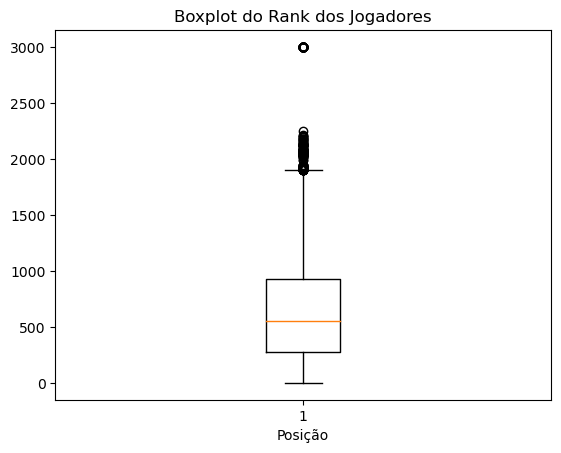

In [56]:
# Obtivemos estatísticas descritivas da variável PlayerRank
estatisticas_player_rank = df['PlayerRank'].describe()
print(estatisticas_player_rank)

# Plotar o boxplot da variável PlayerRank
plt.boxplot(df['PlayerRank'].dropna())
plt.title('Boxplot do Rank dos Jogadores')
plt.xlabel('Posição')
plt.show()

count    9233.000000
mean      881.972490
std       748.723383
min         2.000000
25%       334.000000
50%       699.000000
75%      1181.000000
max      3000.000000
Name: OpponentRank, dtype: float64


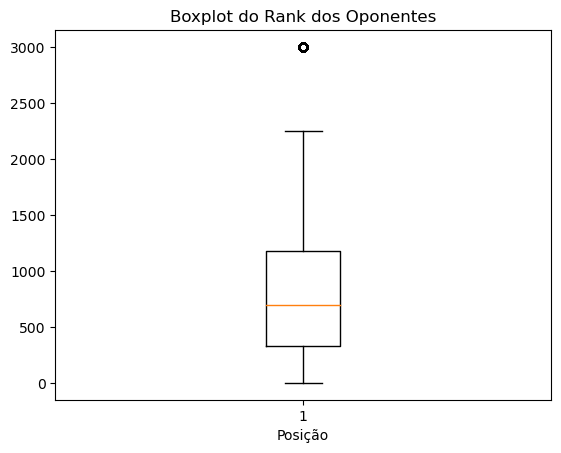

In [57]:
# Obtivemos estatísticas descritivas da variável OpponentRank
estatisticas_opponent_rank = df['OpponentRank'].describe()
print(estatisticas_opponent_rank)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['OpponentRank'].dropna())
plt.title('Boxplot do Rank dos Oponentes')
plt.xlabel('Posição')
plt.show()

count    9233.000000
mean      477.312683
std       579.541944
min         0.000000
25%        92.000000
50%       267.000000
75%       629.000000
max      2971.000000
Name: RankDif, dtype: float64


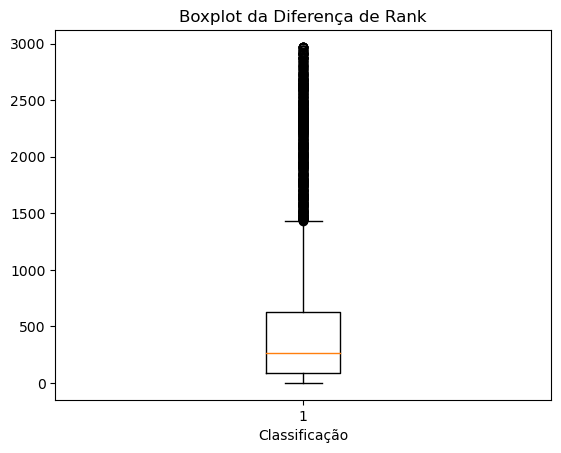

In [58]:
#calculamos a diferença absoluta entre as colunas PlayerRank e OpponentRank e armazena o resultado em uma nova coluna chamada RankDif 
df['RankDif'] = abs(df['PlayerRank'] - df['OpponentRank']) 

# calculamos estatísticas descritivas básicas para a coluna RankDif do DataFrame df e armazenamos essas estatísticas em estatisticas_rankdif
estatisticas_rankdif = df['RankDif'].describe()
print(estatisticas_rankdif)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['RankDif'].dropna())
plt.title('Boxplot da Diferença de Rank')
plt.xlabel('Classificação')
plt.show()

## Age

count    7922.000000
mean       22.681772
std         3.579719
min        14.000000
25%        20.000000
50%        22.000000
75%        25.000000
max        52.000000
Name: PlayerAge, dtype: float64


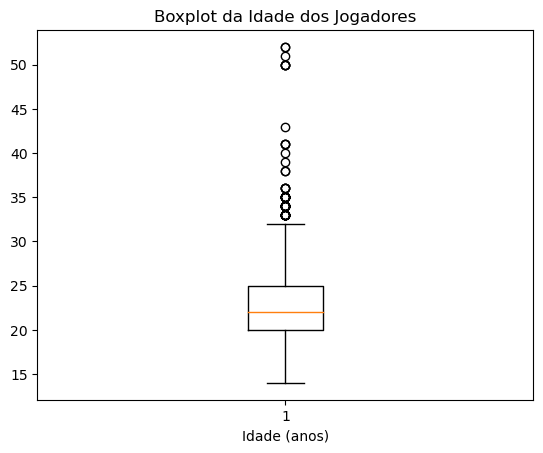

In [59]:
#calculamos estatísticas descritivas básicas para a coluna PlayerAge do DataFrame df e armazenamos essas estatísticas em estatisticas_player_age
estatisticas_player_age = df['PlayerAge'].describe()
print(estatisticas_player_age)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['PlayerAge'].dropna())
plt.title('Boxplot da Idade dos Jogadores')
plt.xlabel('Idade (anos)')
plt.show()

count    9233.000000
mean       22.681772
std         3.315820
min        14.000000
25%        20.000000
50%        22.681772
75%        24.000000
max        52.000000
Name: PlayerAge, dtype: float64


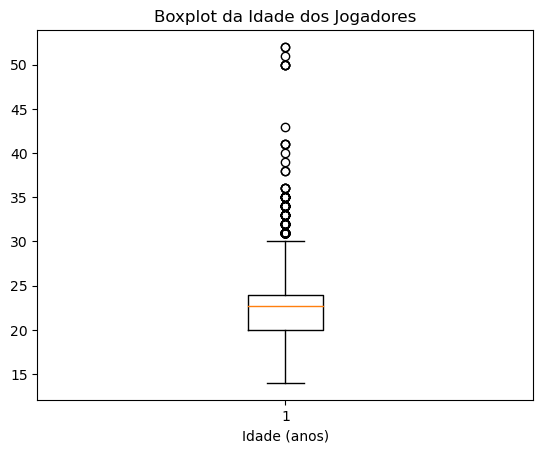

In [60]:
#Substituir os Nas pela media
df['PlayerAge'].fillna(df['PlayerAge'].mean(), inplace=True)

# Obter estatísticas descritivas da variável PlayerAge
estatisticas_player_age = df['PlayerAge'].describe()
print(estatisticas_player_age)

# Plotar o boxplot da variável PlayerAge
plt.boxplot(df['PlayerAge'].dropna())
plt.title('Boxplot da Idade dos Jogadores')
plt.xlabel('Idade (anos)')
plt.show()

count    7382.000000
mean       23.670415
std         3.784020
min        14.000000
25%        21.000000
50%        23.000000
75%        26.000000
max        54.000000
Name: OpponentAge, dtype: float64


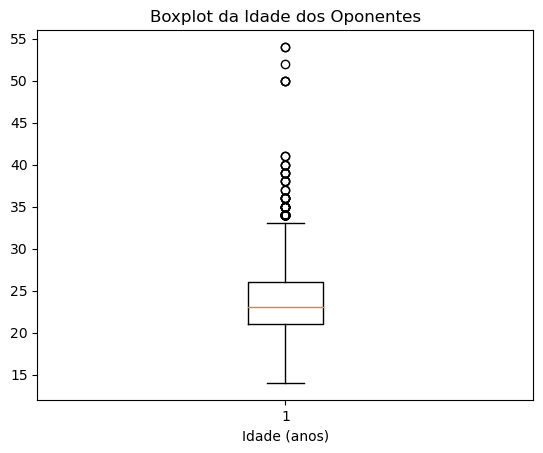

In [61]:
#Calcular estatísticas descritivas básicas para a coluna OpponentAge do DataFrame df.
estatisticas_opponent_age = df['OpponentAge'].describe()
print(estatisticas_opponent_age)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['OpponentAge'].dropna())
plt.title('Boxplot da Idade dos Oponentes')
plt.xlabel('Idade (anos)')
plt.show()

count    9233.000000
mean       23.670415
std         3.383476
min        14.000000
25%        22.000000
50%        23.670415
75%        25.000000
max        54.000000
Name: OpponentAge, dtype: float64


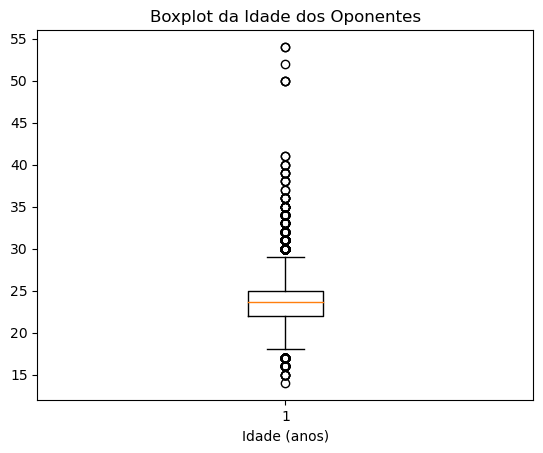

In [62]:
#Substituir os Nas pela media
df['OpponentAge'].fillna(df['OpponentAge'].mean(), inplace=True)

# Obter estatísticas descritivas da variável PlayerOpponent
estatisticas_player_age = df['OpponentAge'].describe()
print(estatisticas_player_age)

# Plotar o boxplot da variável PlayerOpponent
plt.boxplot(df['OpponentAge'].dropna())
plt.title('Boxplot da Idade dos Oponentes')
plt.xlabel('Idade (anos)')
plt.show()

count    9233.000000
mean        3.482385
std         2.926897
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        36.000000
Name: AgeDif, dtype: float64


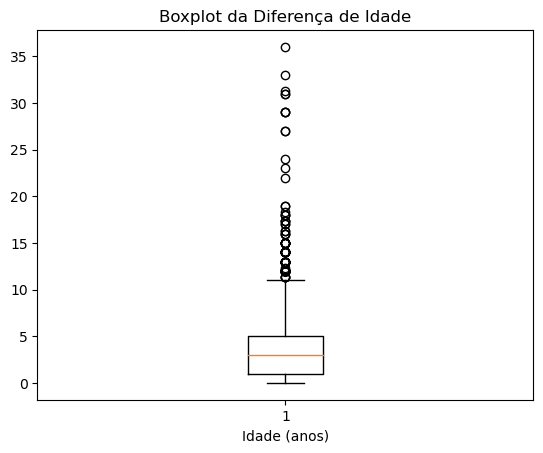

In [63]:
#Calculamos a diferença absoluta entre as idades dos jogadores e seus oponentes. Armazenamos essa diferença em uma nova coluna chamada AgeDif no DataFrame df.
df['AgeDif'] = abs(df['PlayerAge'] - df['OpponentAge'])

#Calcular estatísticas descritivas básicas para a coluna AgeDif. Armazenar essas estatísticas em estatisticas_agedif.
estatisticas_agedif = df['AgeDif'].describe()
print(estatisticas_agedif)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['AgeDif'].dropna())
plt.title('Boxplot da Diferença de Idade')
plt.xlabel('Idade (anos)')
plt.show()

## Height

count    6851.000000
mean      181.443147
std        16.822563
min         0.000000
25%       178.000000
50%       183.000000
75%       188.000000
max       211.000000
Name: PlayerHeight, dtype: float64


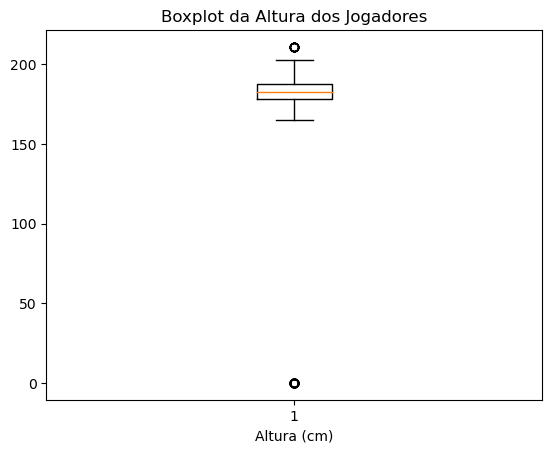

In [64]:
# Obtivemos estatísticas descritivas da variável PlayerHeight
estatisticas_player_height = df['PlayerHeight'].describe()
print(estatisticas_player_height)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['PlayerHeight'].dropna())
plt.title('Boxplot da Altura dos Jogadores')
plt.xlabel('Altura (cm)')
plt.show()

In [65]:
import numpy as np

# Contagem de jogadores com altura zero
count_jogadores_sem_altura = df[df['PlayerHeight'] == 0]['PlayerName'].nunique()
print(count_jogadores_sem_altura)

# Substituimos os valores de altura iguais a zero por NaN
df['PlayerHeight'].replace(0, np.nan, inplace=True)

# Contagem de jogadores com altura ausente (NaN)
count_jogadores_sem_altura = df[df['PlayerHeight'].isna()]['PlayerName'].nunique()
print(count_jogadores_sem_altura)

19
434


count    6802.000000
mean      182.750221
std         6.792237
min       165.000000
25%       178.000000
50%       183.000000
75%       188.000000
max       211.000000
Name: PlayerHeight, dtype: float64


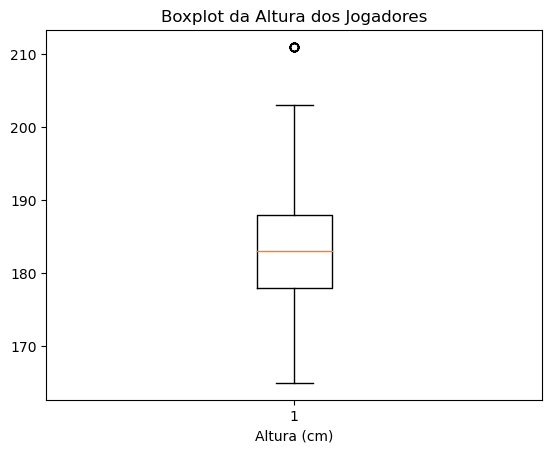

In [66]:
# Obtivemos estatísticas descritivas da variável PlayerHeight
estatisticas_player_height = df['PlayerHeight'].describe()
print(estatisticas_player_height)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['PlayerHeight'].dropna())
plt.title('Boxplot da Altura dos Jogadores')
plt.xlabel('Altura (cm)')
plt.show()

count    9233.000000
mean      182.750221
std         5.829769
min       165.000000
25%       180.000000
50%       182.750221
75%       185.000000
max       211.000000
Name: PlayerHeight, dtype: float64


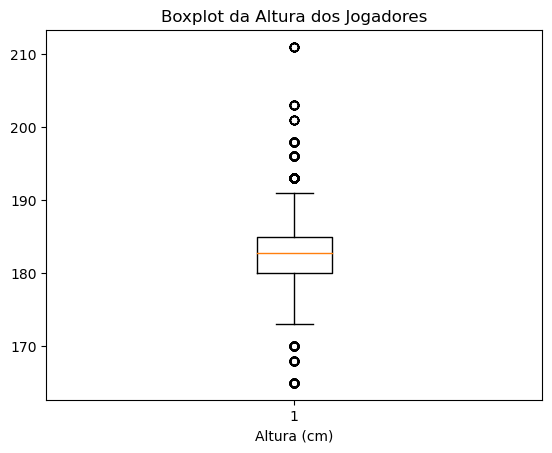

In [67]:
#Substituir os Nas pela media
df['PlayerHeight'].fillna(df['PlayerHeight'].mean(), inplace=True)

# Obter estatísticas descritivas da variável PlayerHeight
estatisticas_player_height = df['PlayerHeight'].describe()
print(estatisticas_player_height)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['PlayerHeight'].dropna())
plt.title('Boxplot da Altura dos Jogadores')
plt.xlabel('Altura (cm)')
plt.show()

count    4911.000000
mean      182.569538
std         7.228790
min        15.000000
25%       178.000000
50%       183.000000
75%       188.000000
max       211.000000
Name: OpponentHeight, dtype: float64

 count    9233.000000
mean      182.603666
std         4.974902
min       165.000000
25%       182.603666
50%       182.603666
75%       183.000000
max       211.000000
Name: OpponentHeight, dtype: float64


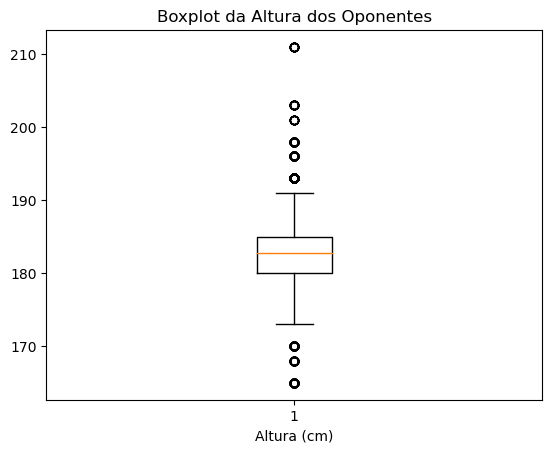

In [68]:
# Substituir valores de altura iguais a zero por NaN
df['OpponentHeight'].replace(0, np.nan, inplace=True)

estatisticas_player_height = df['OpponentHeight'].describe()
print(estatisticas_player_height)

# Substituir valores de altura 15 por NaN
df['OpponentHeight'].replace(15, np.nan, inplace=True)

#Substituir os Nas pela media
df['OpponentHeight'].fillna(df['OpponentHeight'].mean(), inplace=True)

estatisticas_player_height = df['OpponentHeight'].describe() 
print("\n",estatisticas_player_height)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['PlayerHeight'].dropna())
plt.title('Boxplot da Altura dos Oponentes')
plt.xlabel('Altura (cm)')
plt.show()

In [69]:
#df.loc[df['OpponentHeight'] == 15]
#df.loc[df['OpponentName'] == 'Johannes Ingildsen']

count    9233.000000
mean        5.371574
std         5.275982
min         0.000000
25%         0.249779
50%         4.603666
75%         8.000000
max        36.000000
Name: HeightDif, dtype: float64


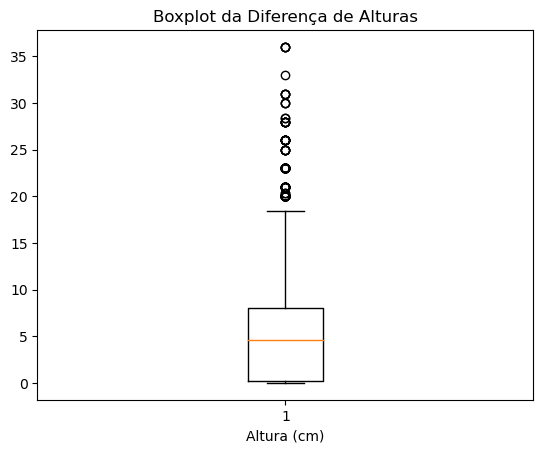

In [70]:
#calcular a diferença absoluta entre as alturas dos jogadores e seus oponentes e armazenar essa diferença em uma nova coluna chamada 'HeightDif'.
df['HeightDif'] = abs(df['PlayerHeight'] - df['OpponentHeight'])

# calcular as estatísticas descritivas para a diferença de altura entre os jogadores e seus oponentes e armazenar essas estatísticas em uma variável chamada estatisticas_heightdif
estatisticas_heightdif = df['HeightDif'].describe()
print(estatisticas_heightdif)

# Plotar o boxplot da variável PlayerHeight
plt.boxplot(df['HeightDif'].dropna())
plt.title('Boxplot da Diferença de Alturas')
plt.xlabel('Altura (cm)')
plt.show()

In [71]:
print(df.shape)
#contan a quantidade de valores ausentes em cada coluna do DataFrame df
df.isna().sum()

(9233, 35)


PlayerName             0
PlayerBorn          2370
PlayerHeight           0
PlayerHand          1490
PlayerRank             0
PlayerBirth         1311
PlayerAge              0
PlayerMainHand         0
PlayerBackHand         0
Tournament             0
Bo3_Bo5                0
Location               0
Date                   0
Start_Date             0
End_Date              35
Season                 0
Ground                 0
Prize                181
GameRound              0
WL                     0
Score                  0
Withdrawal          8835
Sets                 398
OpponentName           0
OpponentBorn        4248
OpponentHeight         0
OpponentHand        2874
OpponentRank           0
OpponentBirth       1851
OpponentAge            0
OpponentMainHand       0
OpponentBackHand       0
RankDif                0
AgeDif                 0
HeightDif              0
dtype: int64

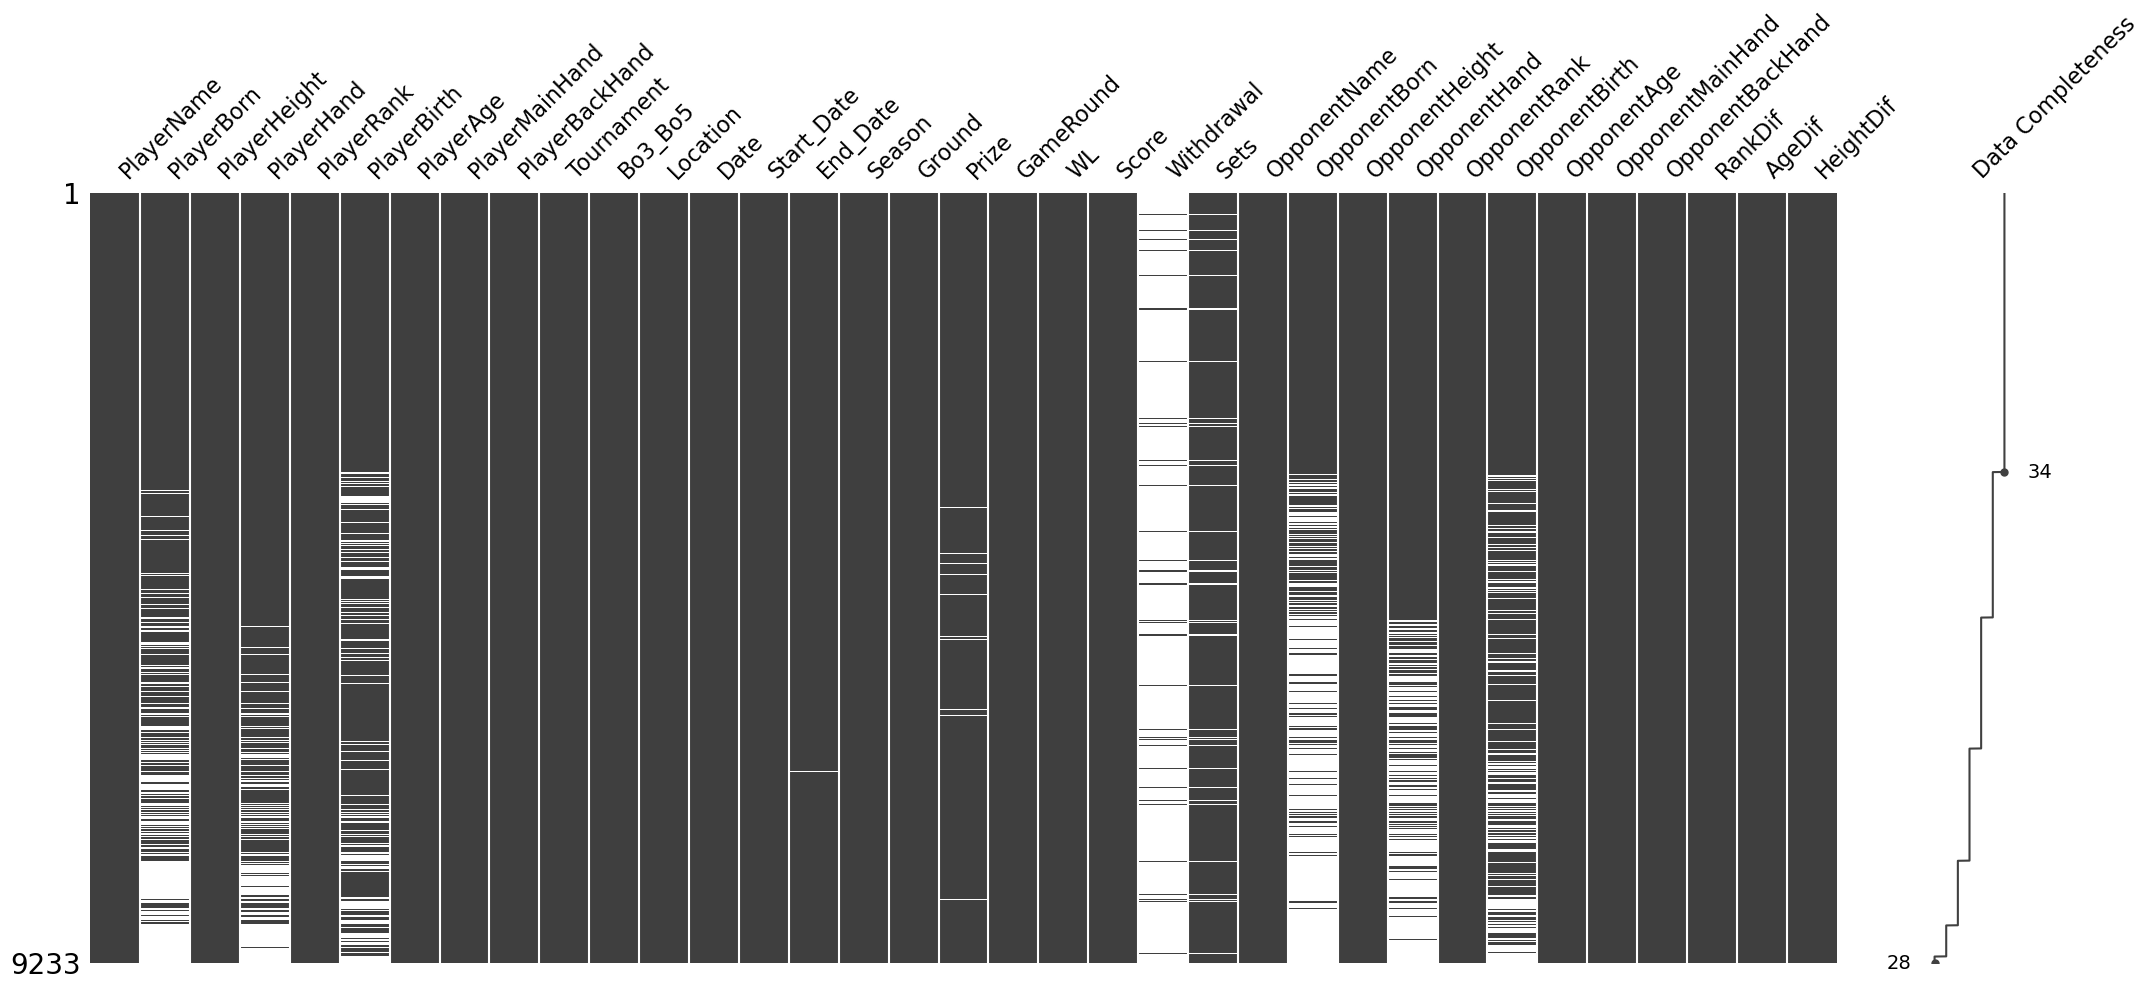

In [72]:
import missingno as msno
#usamos a função matrix do pacote missingno para visualizar padrões de dados ausentes no DataFrame df
msno.matrix(df, labels=True, sort="descending");

#Codigo para ver estatisticas das variaveis
def stats(df):
    
    stats = df.describe(include='all')
    stats = stats.round(2)

    # Plotting as a table
    plt.figure(figsize=(10, 6))
    table = plt.table(cellText=stats.values,
                    colLabels=stats.columns,
                    rowLabels=stats.index,
                    loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)
    plt.axis('off')  # Turn off axis
    plt.title('Descriptive Statistics')
    plt.show()
    
stats(df.iloc[:, :8])
stats(df.iloc[:, 8:16])
stats(df.iloc[:, 16:24])
stats(df.iloc[:, 24:32])

In [73]:
#Indica-nos o numero e o nome de colunas do data frame
print(df.shape[1],df.shape[0])
df.columns

35 9233


Index(['PlayerName', 'PlayerBorn', 'PlayerHeight', 'PlayerHand', 'PlayerRank',
       'PlayerBirth', 'PlayerAge', 'PlayerMainHand', 'PlayerBackHand',
       'Tournament', 'Bo3_Bo5', 'Location', 'Date', 'Start_Date', 'End_Date',
       'Season', 'Ground', 'Prize', 'GameRound', 'WL', 'Score', 'Withdrawal',
       'Sets', 'OpponentName', 'OpponentBorn', 'OpponentHeight',
       'OpponentHand', 'OpponentRank', 'OpponentBirth', 'OpponentAge',
       'OpponentMainHand', 'OpponentBackHand', 'RankDif', 'AgeDif',
       'HeightDif'],
      dtype='object')

In [74]:
# verificamos os valores únicos na coluna 'Bo3_Bo5' do DataFrame df
df['Bo3_Bo5'].unique()

array([3, 5], dtype=int64)

In [75]:
df = df[df['Bo3_Bo5'] == 3]

In [76]:
# Exportar o DataFrame df_final para um arquivo CSV
# Já Exportado
df.to_csv('df_semDummies20-05_soBo3.csv', index=False)

In [77]:
df.iloc[1]

PlayerName                            Daniil Medvedev
PlayerBorn                             Moscow, Russia
PlayerHeight                                    198.0
PlayerHand          Right-Handed, Two-Handed Backhand
PlayerRank                                       99.0
PlayerBirth                       1996-02-11 00:00:00
PlayerAge                                        20.0
PlayerMainHand                           Right-Handed
PlayerBackHand                    Two-Handed Backhand
Tournament                                    Chennai
Bo3_Bo5                                             3
Location                               Chennai, India
Date                          2017.01.02 - 2017.01.08
Start_Date                        2017-01-02 00:00:00
End_Date                          2017-01-08 00:00:00
Season                             Shishira (Inverno)
Ground                                           Hard
Prize                                        $447,480
GameRound                   